### **Sentiment analysis for Movies**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from time import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve

**Load the data**

In [5]:
# Amazon Data
input_file = './data/amazon_labelled.txt'
amazon = pd.read_csv(input_file, delimiter='\t', header=None)
amazon.columns = ['sentence', 'Class']

# Imdb Data
input_file = './data/imdb_labelled.txt'
imdb = pd.read_csv(input_file, delimiter='\t', header=None)
imdb.columns = ['sentence', 'Class']

# Yelp Data
input_file = './data/yelp_labelled.txt'
yelp = pd.read_csv(input_file, delimiter='\t', header=None)
yelp.columns = ['sentence', 'Class']

amazon.head()

,sentence,Class
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [ ]:
# Combine data sets
together = pd.DataFrame()
together = pd.concat([amazon, imdb, yelp])

# Remove numbers
together['sentence'] = together['sentence'].replace('\d', '', regex=True)

#remove punctuations and special chracters
together['sentence'] = together['sentence'].str.replace('[^\w\s]','')

print(together['Class'].value_counts())
print(together.shape)
together.head()

1    1386
0    1362
Name: Class, dtype: int64
(2748, 2)


,sentence,Class
0,So there is no way for me to plug it in here i...,0
1,Good case Excellent value,1
2,Great for the jawbone,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great,1


**Train and Test sets**

In [ ]:
train_data, test_data = train_test_split(together, train_size=0.8, random_state=0)
print(train_data.shape)
print(test_data.shape)
train_data.head()

(2198, 2)
(550, 2)


,sentence,Class
824,Awful service,0
526,horrible had to switch times,0
509,The fat computer geek was unbelievable the bib...,0
144,The phone takes FOREVER to charge like to ho...,0
735,Probably never coming back and wouldnt recomme...,0


**Tokenizer**

In [ ]:
# CountVectorizer() converts 
# text documents to a matrix of token counts
vectorizer = CountVectorizer()

# Select the columns and prepare data for the models 
X_train = vectorizer.fit_transform(train_data['sentence'])
y_train = train_data['Class']

X_test = vectorizer.transform(test_data['sentence'])
y_test = test_data['Class']

# TF-IDF
# Weights the number of words 
# of each sentence: nr_words/total_words
# Also reduce the weight of common words
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_test_tfidf = tfidf_transformer.transform(X_test)

X_train_tfidf.shape

(2198, 4713)

**Word Cloud with the most often negative words**

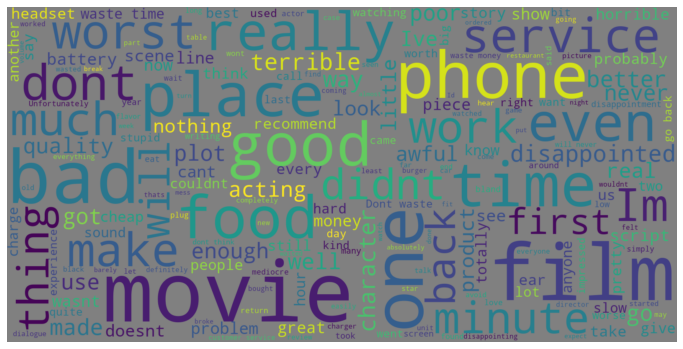

In [ ]:
neg_phrases = train_data[train_data.Class == 0]
neg_words = []
for t in neg_phrases.sentence:
    neg_words.append(t)

neg_text = pd.Series(neg_words).str.cat(sep=' ')

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='grey', width=1600, height=800,
                      max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Machine Learning Models**

In [ ]:
# 4 different models

# Logistic Regression
t0 = time()
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
print('Elapsed time Logistic Regression: ', '%.3f'%(time() - t0) , 's')

# Naive Bayes
t0 = time()
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
print('Elapsed time Naive Bayes: ', '%.3f'%(time() - t0) , 's')

# Neural Network
t0 = time()
nn = MLPClassifier()
nn.fit(X_train_tfidf, y_train)
print('Elapsed time Neural Network: ', '%.3f'%(time() - t0) , 's')

# Support Vector Machine
t0 = time()
svm = SVC()
svm.fit(X_train_tfidf, y_train)
print('Elapsed time Support Vector Machine: ', '%.3f'%(time() - t0) , 's')

Elapsed time Logistic Regression:  0.055 s
Elapsed time Naive Bayes:  0.002 s
Elapsed time Neural Network:  16.359 s
Elapsed time Support Vector Machine:  0.745 s


**Make the predictions on the test sample**


In [ ]:
# Define a dataframe for the predictions
df2 = test_data.copy()

df2['Logistic Regression'] = lr.predict(X_test_tfidf)
df2['Naive Bayes'] = nb.predict(X_test_tfidf)
df2['SVM'] = svm.predict(X_test_tfidf)
df2['Neural Network'] = nn.predict(X_test_tfidf)
df2.tail()

,sentence,Class,Logistic Regression,Naive Bayes,SVM,Neural Network
43,Too politically correct,0,0,0,0,0
878,Does not work for listening to music with the ...,0,0,0,0,0
15,I was shocked because no signs indicate cash only,0,0,0,0,0
303,Good price,1,1,1,1,1
132,Headset works great was packaged nicely to av...,1,1,1,1,1


### **Model evaluation**

**Classification report (Precision, Accuracy, Recall, F1-Score)**

In [ ]:
dic_ml = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Neural Network']  

for ml in dic_ml:
  acc = accuracy_score(y_test, df2[ml], normalize=True)
  cl_report = classification_report(y_test, df2[ml], labels=[1, 0]) 
  print(ml, '\n', cl_report, '\n', '='*50)

Logistic Regression 
               precision    recall  f1-score   support

           1       0.82      0.82      0.82       269
           0       0.83      0.83      0.83       281

    accuracy                           0.82       550
   macro avg       0.82      0.82      0.82       550
weighted avg       0.82      0.82      0.82       550
 
Naive Bayes 
               precision    recall  f1-score   support

           1       0.79      0.81      0.80       269
           0       0.81      0.79      0.80       281

    accuracy                           0.80       550
   macro avg       0.80      0.80      0.80       550
weighted avg       0.80      0.80      0.80       550
 
SVM 
               precision    recall  f1-score   support

           1       0.81      0.83      0.82       269
           0       0.83      0.81      0.82       281

    accuracy                           0.82       550
   macro avg       0.82      0.82      0.82       550
weighted avg       0.82      0

-Classification accuracy shows how many of the predictions are correct.

-Precision measures how good our model is when the prediction is positive. The focus of precision is positive predictions. It indicates how many positive predictions are true.

Precision is a good score to evaluate the models because we want to detect negative comments with less mistakes (To compare precisions, we must look at the precision values for True.). However, if we predict positive comments false, it will not have a negative impact. 

-Recall measures how good our model is at correctly predicting positive classes. Increasing precision decreases recall and vice versa. For an email spam detection model, we try to maximize precision because we want to be correct when an email is detected as spam. We do not want to label a normal email as spam (i.e. false positive). On the other hand, for a tumor detection task, we need to maximize recall because we want to detect positive classes as much as possible.

-F1 score is the weighted average of precision and recall. F1 score is a more useful measure than accuracy for problems with uneven class distribution because it takes into account both false positive and false negatives. The best value for f1 score is 1 and the worst is 0.

-Sensitivity, also known as the true positive rate (TPR), is the same as recall. Hence, it measures the proportion of positive class that is correctly predicted as positive.
Specificity is similar to sensitivity but focused on negative class. It measures the proportion of negative class that is correctly predicted as negative.

-ROC and AUC. The closer the AUC is to 1, the better the classifier is. In the figure below, classifier A is better than classifier B.

**Confusion Matrices**

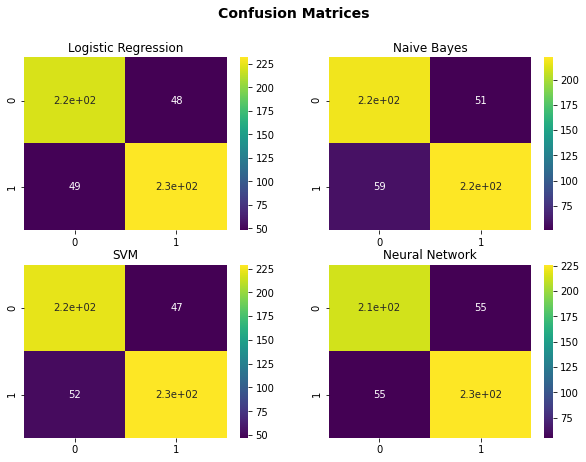

In [ ]:
fig1 = plt.figure(figsize=(10, 7))
fig1.suptitle('Confusion Matrices', fontsize=14, fontweight='bold')

i = 0
for ml in dic_ml:
  cm = confusion_matrix(y_test, df2[ml], labels=[1, 0])
  ax = fig1.add_subplot(2, 2, 1 + i)
  plt.title(ml)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  im = sns.heatmap(cm, annot=True, cmap="viridis", cbar=True)
  i = i + 1
plt.show()

**ROC Curve**

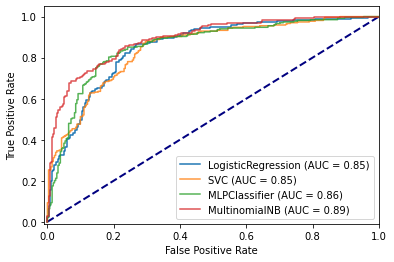

In [ ]:
lr_disp = plot_roc_curve(lr, X_test, y_test)
ax = plt.gca()
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
svm_disp = plot_roc_curve(svm, X_test, y_test, ax=ax, alpha=0.8)
nn_disp = plot_roc_curve(nn, X_test, y_test, ax=ax, alpha=0.8)
nb_disp = plot_roc_curve(nb, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

## **Conclusions**

-The Neural Network takes too much time to run, it has to be better parametrized to be used more efficiently (even using other libraries). Therefore, the MLPClassifier should be discarded.



We can observed that both logistic regression and multinomial naive bayes model performing well compared to linear support vector machines.
Still we can improve the accuracy of the models by preprocessing data and by using lexicon models like Textblob.